# Project on "Machine Learning" - Spilios Dellis

In this project, several features and machine learning algorithms were employed for the detection of bird sounds on audio recordings. The dataset consists of over 7000 excerpts from field recording around the world, gathered by the FreeSound project (https://freesound.org/), and standardized by the Machine Listening Lab of the Queens Mary University of London. The audio recording can be downloaded from https://archive.org/download/ff1010bird/ff1010bird_wav.zip, and the data labels can be downloaded from https://ndownloader.figshare.com/files/6035814.

## 1. Features

### 1.1. Features extraction

Features were extracted from chromograms of the audio recordings by a two step process. Firstly, a chromogram for each audio recording was created and saved as an image. Then, features from this image were extracted using a convolution neural network. Specifically, for each audio file two chromograms, computed from waveforms (https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html) and using constant-Q method (https://librosa.org/doc/main/generated/librosa.feature.chroma_cqt.html). From each one of them, a vector of 4096 features was extracted using the pre-trained VGG16 model (the features can be extracted again by running the cell below). The feature vectors were collected in a data frame regarding their origin; two data frames containing feature vectors from the two types of chromograms have been created (for convenience the data frames have been saved and can be loaded by running the second cell).

In [1]:
# To re-extract the feature vectors please uncomment the line below.
# run FeaturesExtraction.py


In [2]:
#Import dataframes with extracted features
import pandas as pd
DataCQTChroma = pd.read_pickle('Data_Chroma_CQT.pkl')
DataSTFTChroma = pd.read_pickle('Data_Chroma_STFT.pkl')

### 1.2. Features preprocessing

Before the model training the features are preprocessed by: 
1. ***Resampling***. The original dataset is highly imbalanced with approximately 25 % of them be bird sounds. Therefore, resampling in the training datasets is performed by over-sample the minority class before model training (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html).
2. ***Standarization***. The features were standarized Standardize features by removing the mean and scaling to unit variance (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 
3. ***Principal components analysis***. As the number of features were more than 4000 principal components analysis was employed (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). The features were projected in principal components that describe the 80 % of the features variance. 

The sequency of preprocessing steps as they are presented above is followed.

## 2. Machine learning alogrithms

### 2.1. Comparison of different algorithms

Five different machine learning algorithms were trained using the features extracted from the chromograms and spectrograms, namely Ridge Classification (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html), Logistic Regression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), Gaussian Naive Bayes (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), k Nearest Neighbours (https://scikit-learn.org/stable/modules/neighbors.html), and Decision Tree Classification (https://scikit-learn.org/stable/modules/tree.html).

#### 2.1.1. Chromogram (CQT)

The area under the ROC curve for the
SVM on Chromogram (CQT) is 0.6341731245027193
Logistic Regression on Chromogram (CQT) is 0.5923988272351742
Gaussian Naive Bayes classification on Chromogram (CQT) is 0.6173854755910146
Decision Tree classification on Chromogram (CQT) is 0.5331870102126454
NN on Chromogram (CQT) is 0.5635102289943215


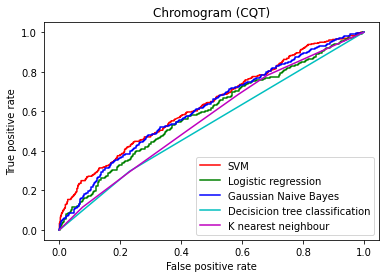

In [3]:
#Separate features from labels
X_CQT = DataCQTChroma.iloc[:,2:]
Y_CQT = DataCQTChroma.iloc[:,1]
#Keep 10 % of the data as validation dataset
from sklearn.model_selection import train_test_split
x_cqt,x_cqtval,y_cqt,y_cqtval=train_test_split(X_CQT,Y_CQT,test_size=0.1,random_state=123)
from MachineLearningProjectFunctions import algcomp
algcomp('Chromogram (CQT)', x_cqt,y_cqt)

#### 2.1.2. Chromogram (STFT)

The area under the ROC curve for the
SVM on Chromogram (STFT) is 0.7079395960718918
Logistic Regression on Chromogram (STFT) is 0.6699773294531819
Gaussian Naive Bayes classification on Chromogram (STFT) is 0.6802308472026943
Decision Tree classification on Chromogram (STFT) is 0.5833551319360428
NN on Chromogram (STFT) is 0.6376091292548147


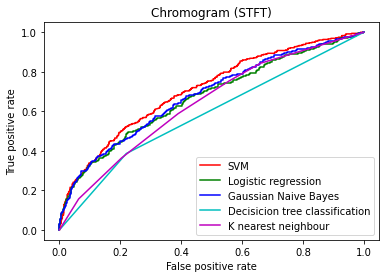

In [4]:
#Separate features from labels
X_SFTF = DataSTFTChroma.iloc[:,2:]
Y_SFTF = DataSTFTChroma.iloc[:,1]
#Keep 10 % of the data as validation dataset
from sklearn.model_selection import train_test_split
x_stft,x_stftval,y_stft,y_stftval=train_test_split(X_SFTF,Y_SFTF,test_size=0.1,random_state=123)
from MachineLearningProjectFunctions import algcomp
algcomp('Chromogram (STFT)', x_stft,y_stft)

### 2.2. Comparison of different features

As it can be seen in section 2.1 the SVM gives the best results for both types of features. Therefore, in the next step the performance of the SVM algorithms on both type of features will be evaluated using the 10 % of the original data that has been kept as validation dataset. The remain 90 % of the data will be used for models training.

The area under the ROC curve for
Chromogram (CQT) is 0.5978379857690201
Chromogram (STFT) is 0.6990695128626163


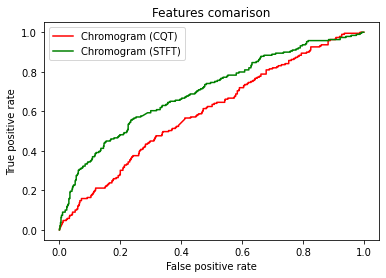

In [5]:
from MachineLearningProjectFunctions import featurescomp
CQTModel,ScalerCQT,PCA_CQT,STFTModel,ScalerSTFT,PCASTFT = featurescomp('Chromogram (CQT)','Chromogram (STFT)', x_cqt,y_cqt,x_cqtval,y_cqtval,x_stft,y_stft,x_stftval,y_stftval)

Comparing the area under the curve for SVM models trained on features of the chromograms computed by constant Q-method and wavefrom shows that the latter give better predictions. Thus, the selected features are that from the chromograms prepared from the audio regording waveforms. 

## 3. Use of trained data in different dataset

As a demo the trained SVM model is used for the detection of bird sound on a different set of audio recorgings. This dataset comes from a UK-based bird-sound crowdsourcing research spinout called Warblr. It consisted from more than 7000 ten-seconds smartphone  audio recording from around the UK. Features from these audi recorging are extracted employing the same CNN model (VGG16) from their respective chromograms, computed fromt waveforms. The features are in the dataframe "Data_Chroma_STFTval.pkl", although they can be extracted again by uncomment the above cell. The dataset can be downloaded by https://archive.org/download/warblrb10k_public/warblrb10k_public_wav.zip and the labels from https://ndownloader.figshare.com/files/6035817.

In [6]:
# To re-extract the feature vectors please uncomment the line below.
# run FeaturesExtractionVal.py

In [7]:
#Set the number of examples you want to be used in the validation
NumberofExamples = 10

from MachineLearningProjectFunctions import modelval
Precission, Recall, F1 = modelval(STFTModel,ScalerSTFT,PCASTFT,NumberofExamples)

Employing the trained model to 10 examples form the validation dataset results to a precision of 1.0 , a recall of 0.89 ,and in a F1 score of 0.94 for the detection of bird sounds.
In the validation dataset 76.0 % of the audio recordings contains bird sounds.


## Summary/Conclusions

In this project a pretrained convolution neural network wasa employed to extract features from chomograms of audio sounds. Two method were employed for the computation of the chomograms, the constant-Q method and using the audio recordings waveforms. For each audio recording a chromogram of each type was prepared and the corresponding feature vector was created. The feature vectors from each type of chromogram were used to train different machine learning algorithms, namely SVM, Logistic Regression, Gaussian Naive Bayes, Decisition Tree Classification, and K Nearest Neighbour. For each trained model the ROC curve was prepared and the area under ROC curve was used for the algorithms comparison. This shows that for both type of features the SVM algorithm gives the best results. The performance of the SVM in the two types of feautures was investigated again using as a figure of merit the area under the ROC curve. This comparison indicates that the combination of features extracted from the chomograms prepared from waveforms and SVM gives the best results among the investigated combinations. 